# Summary of Dataset Preprocessing and Analysis

## 1. Virtual Environment Setup
   - Created a virtual environment named `dmp`
   - Installed necessary libraries: `ipykernel`, `numpy`, `torch`, `torchvision`
   - Verified the versions of Python, NumPy, and PyTorch
   - Checked GPU availability and memory status
   - Configured the `dmp` environment as a Jupyter kernel for seamless integration

## 2. Initial Dataset Analysis
   - Independently analyzed each of the three initial datasets:
     - **Structure Analysis**: Mapped class directories and hierarchy
     - **Distribution Analysis**: Counted the number of images per class
     - **Visualization**: Generated distribution plots for each dataset's class structure

## 3. Initial Deduplication
   - Performed deduplication on each dataset separately:
     - **Functions Utilized**:
       - `calculate_phash()`: Generated perceptual hashes for image fingerprinting
       - `find_similar_images()`: Detected duplicates based on hamming distance
       - `save_unique_images()`: Retained only unique files
     - **Outcome**:
       - Created deduplicated datasets: `dataset1_unique`, `dataset2_unique`, and `dataset3_unique`
       - Updated and visualized class distributions for the deduplicated datasets

## 4. Dataset Merging
   - Combined the deduplicated datasets into a single unified dataset:
     - **Procedure**:
       - Created a `dataset_combined` directory
       - Preserved original class structure
       - Ensured consistent organization across classes

## 5. Final Deduplication
   - Conducted a second round of deduplication on the merged dataset:
     - **Results**:
       - Generated a completely clean dataset named `dataset_combined_unique`
       - Created updated statistics and visualized the distribution
       - Eliminated duplicates across all datasets comprehensively

## 6. Tools and Libraries Utilized
   - **Image Processing**: Used PIL for image operations and `imagehash` for duplicate detection
   - **Visualization**: Employed `matplotlib` and `seaborn` for creating plots
   - **Parallel Processing**: Leveraged `ThreadPoolExecutor` for deduplication efficiency
   - **Statistical Analysis**: Utilized `Counter` for counting class instances and `numpy` for numerical operations
   - **Deep Learning**: Employed PyTorch and `torchvision` for GPU usage and image handling

## 7. Final Outcome
   - Delivered a clean, unified dataset without any duplicate images
   - Preserved the original class structure and validated with statistical analyses
   - Generated comprehensive documentation, including statistical summaries and distribution visualizations
   - Provided a ready-to-use dataset optimized for further model training and analysis


## Datasets for Bangla Currency Classification

### Dataset 1: Bangla Money Dataset
- **Description**: A dataset for Bangla currency recognition and classification tasks.
- **Source**: [Bangla Money Dataset on Kaggle](https://www.kaggle.com/datasets/nsojib/bangla-money/data)
- **Details**: The dataset includes images of different denominations of Bangladeshi banknotes, ideal for tasks involving image classification, currency recognition, and validation.

### Dataset 2: Augmented Bangla Money Dataset (Including 200 Taka)
- **Description**: This dataset extends the original Bangla Money dataset with augmented images and includes the newly issued 200 Taka banknote.
- **Source**: [Augmented Bangla Money Dataset on Kaggle](https://www.kaggle.com/datasets/tazwarmohammed/augmented-bangla-money-dataset-including-200-taka/data)
- **Details**: Useful for training deep learning models with more diverse data, incorporating various angles, lighting conditions, and new denomination inclusion.

### Dataset 3: Bangladeshi Banknote Dataset
- **Description**: A comprehensive dataset focusing on Bangladeshi banknotes for classification and recognition tasks.
- **Source**: [Bangladeshi Banknote Dataset on Kaggle](https://www.kaggle.com/datasets/rahnumatasnim1604103/bangladeshi-banknote-dataset/data)
- **Details**: Provides a broad collection of images, supporting tasks such as banknote authenticity verification, recognition, and currency condition assessment.

In [1]:
# # Create the virtual environment named 'dmp'
!python3 -m venv /scratch/movi/dmp
# Install ipykernel inside the 'dmp' environment
!/scratch/movi/dmp/bin/pip install ipykernel
# Add 'dmp' as a kernel for Jupyter Notebook
!/scratch/movi/dmp/bin/python -m ipykernel install --user --name=dmp --display-name "Python (dmp)"
# # Upgrade pip in the 'dmp' environment
# !/scratch/movi/dmp/bin/python3 -m pip install --upgrade pip
# # Install necessary packages (NumPy, PyTorch, etc.) inside 'dmp'
# !/scratch/movi/dmp/bin/pip install numpy torch torchvision torchaudio pandas matplotlib scikit-learn


# !pip uninstall -y tensorflow
# !pip install numpy==1.21.4 scikit-learn==1.0.2
# import tensorflow as tf
# print("TensorFlow version:", tf.__version__)

Installed kernelspec dmp in /home/movi/.local/share/jupyter/kernels/dmp


In [2]:
# Prints the installed versions of Python, NumPy, and PyTorch libraries

import sys
import numpy as np
import torch

print(f"Python Version: {sys.version}")
print(f"NumPy Version: {np.__version__}")
print(f"PyTorch Version: {torch.__version__}")



# Function to check GPU availability and display memory statistics using PyTorch's CUDA interface

def check_gpu_status():
    # Check if GPU is available
    if torch.cuda.is_available():
        print(f"CUDA is available. PyTorch is using GPU.\n")

        # Get the number of available GPUs
        num_gpus = torch.cuda.device_count()
        print(f"Number of GPUs available: {num_gpus}")

        # Loop through each GPU and display its details
        for gpu_id in range(num_gpus):
            gpu_name = torch.cuda.get_device_name(gpu_id)
            gpu_memory_allocated = torch.cuda.memory_allocated(gpu_id) / (1024 ** 3)  # In GB
            gpu_memory_cached = torch.cuda.memory_reserved(gpu_id) / (1024 ** 3)      # In GB
            gpu_memory_total = torch.cuda.get_device_properties(gpu_id).total_memory / (1024 ** 3)  # In GB

            print(f"\nGPU {gpu_id}: {gpu_name}")
            print(f"  Total Memory: {gpu_memory_total:.2f} GB")
            print(f"  Memory Allocated: {gpu_memory_allocated:.2f} GB")
            print(f"  Memory Reserved (Cached): {gpu_memory_cached:.2f} GB")
    else:
        print("CUDA is not available. PyTorch is using the CPU.")

# Run the GPU status check
check_gpu_status()

Python Version: 3.9.9 (main, Mar 25 2022, 16:08:31) 
[GCC 10.3.0]
NumPy Version: 1.21.4
PyTorch Version: 1.12.1+cu113
CUDA is available. PyTorch is using GPU.

Number of GPUs available: 1

GPU 0: NVIDIA A100-SXM4-80GB MIG 3g.40gb
  Total Memory: 39.25 GB
  Memory Allocated: 0.00 GB
  Memory Reserved (Cached): 0.00 GB


# Dataset 01 Details

### Print Dataset 01 Details


Dataset Analysis Report

Dataset Root Path: /scratch/movi/dm_project/data/dataset1

Number of Classes: 10

Classes: 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000
1: 121 images
2: 250 images
5: 250 images
10: 251 images
20: 210 images
50: 250 images
100: 245 images
200: 0 images
500: 173 images
1000: 220 images

Total number of images: 1970



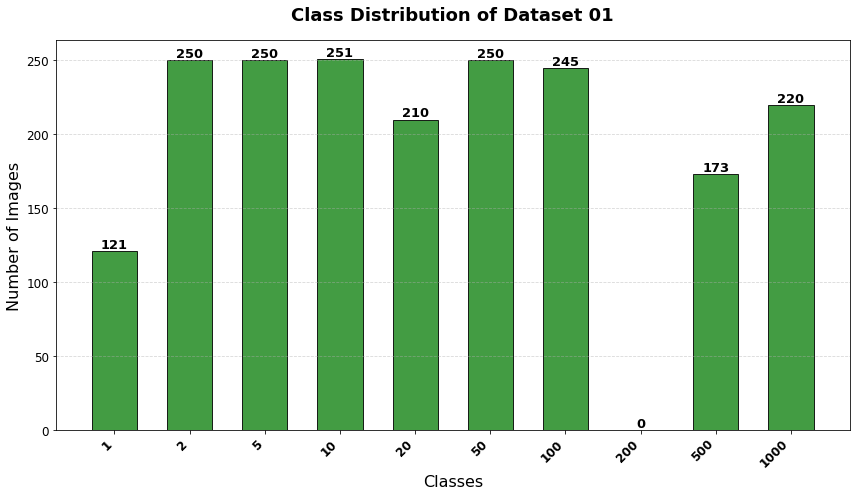

In [19]:
import os
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np
from pathlib import Path

def analyze_dataset(dataset_path):
    """
    Analyzes the dataset and prints comprehensive statistics
    """
    print("\n" + "="*50)
    print("Dataset Analysis Report")
    print("="*50)

    # 1. Basic Dataset Structure
    print(f"\nDataset Root Path: {dataset_path}")

    # Get all classes (subdirectories) and sort numerically, ignoring hidden directories (those starting with '.')
    classes = sorted(
        [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d)) and not d.startswith('.')],
        key=lambda x: float(x.replace('class', ''))  # Sort numerically
    )
    print(f"\nNumber of Classes: {len(classes)}")
    print("\nClasses:", ", ".join(classes))

    # 2. Class Distribution
    class_counts = {}
    total_images = 0

    for class_name in classes:  # Using sorted classes
        class_path = os.path.join(dataset_path, class_name)
        count = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
        class_counts[class_name] = count
        total_images += count
        print(f"{class_name}: {count} images")

    print(f"\nTotal number of images: {total_images}\n")

    # 3. Visualizations - Only Class Distribution
    # Set a minimal and clean style for professional appearance
    plt.style.use('seaborn-deep')
    sns.set_palette("husl")

    # Create figure with appropriate size for publication clarity
    plt.figure(figsize=(12, 7))

    # Create the bar plot with slightly translucent bars for visual distinction
    bars = plt.bar(class_counts.keys(), class_counts.values(), color='forestgreen', width=0.6, alpha=0.85, edgecolor='black')

    # Customize the appearance of labels and title for professional presentation
    plt.xticks(rotation=45, ha='right', fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12)
    plt.title('Class Distribution of Dataset 01', pad=20, fontsize=18, fontweight='bold')
    plt.ylabel('Number of Images', fontsize=16)
    plt.xlabel('Classes', fontsize=16)

    # Add value labels on top of each bar with consistent styling
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2., height,
            f'{int(height):,}',  # Thousand separator for better readability
            ha='center',
            va='bottom',
            fontsize=13,
            fontweight='bold',
            color='black'
        )

    # Add grid lines only for y-axis for clarity, with a light and non-intrusive style
    plt.grid(axis='y', linestyle='--', alpha=0.5)

    # Adjust layout to ensure no label is cut off
    plt.tight_layout()

    # Save the figure with high DPI for publication quality, use a vector format (e.g., .pdf) for better scaling
    plt.savefig('class_distribution_of_dataset_01.png', dpi=300, bbox_inches='tight', format='png')

    # Display the plot
    plt.show()

    print("\n" + "="*50)

if __name__ == "__main__":
    dataset_path = "/scratch/movi/dm_project/data/dataset1"
    analyze_dataset(dataset_path)


### Find Unique Images From Dataset 01

In [20]:
import os
import imagehash
from PIL import Image
import shutil
from pathlib import Path
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm
import numpy as np
from collections import defaultdict

def calculate_phash(image_path):
    """Calculate perceptual hash of image using pHash algorithm"""
    try:
        with Image.open(image_path) as img:
            # Convert to grayscale to focus on structural similarity
            img = img.convert('L')
            # Calculate perceptual hash
            return str(imagehash.average_hash(img))
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

def find_similar_images(hash_dict, hash_value, threshold=5):
    """Find similar images within threshold hamming distance"""
    if not hash_value:
        return None

    for existing_hash in hash_dict:
        # Calculate hamming distance between hashes
        if sum(c1 != c2 for c1, c2 in zip(hash_value, existing_hash)) <= threshold:
            return existing_hash
    return None

def process_image(args):
    """Process single image for parallel execution"""
    file_path, destination_folder, class_folder = args
    hash_value = calculate_phash(file_path)
    return (file_path, hash_value, class_folder)

def save_unique_images(class_folder, destination_folder, threshold=5):
    """Find and save unique images using parallel processing"""
    image_hashes = {}
    duplicates = defaultdict(list)

    # Get list of all images
    image_files = []
    for root, _, files in os.walk(class_folder):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                file_path = os.path.join(root, file)
                image_files.append((file_path, destination_folder, class_folder))

    # Process images in parallel
    with ThreadPoolExecutor() as executor:
        results = list(tqdm(
            executor.map(process_image, image_files),
            total=len(image_files),
            desc=f"Processing {Path(class_folder).name}"
        ))

    # Process results and find duplicates
    for file_path, hash_value, class_folder in results:
        if hash_value:
            similar_hash = find_similar_images(image_hashes, hash_value, threshold)
            if similar_hash is None:
                # New unique image
                image_hashes[hash_value] = file_path
                # Copy to destination
                relative_path = os.path.relpath(file_path, class_folder)
                dest_path = os.path.join(destination_folder, relative_path)
                os.makedirs(os.path.dirname(dest_path), exist_ok=True)
                shutil.copy2(file_path, dest_path)
            else:
                # Duplicate found
                duplicates[image_hashes[similar_hash]].append(file_path)

    return len(image_files), len(image_hashes), duplicates

def main():
    # Directories
    source_folder = "/scratch/movi/dm_project/data/dataset1"
    destination_folder = "/scratch/movi/dm_project/data/dataset1_unique"
    os.makedirs(destination_folder, exist_ok=True)

    # Statistics
    overall_stats = {
        'total': 0,
        'unique': 0,
        'duplicates': 0
    }

    # Process each class
    for class_name in sorted(os.listdir(source_folder)):
        class_folder = os.path.join(source_folder, class_name)

        if os.path.isdir(class_folder):
            dest_class_folder = os.path.join(destination_folder, class_name)
            total, unique, duplicates = save_unique_images(class_folder, dest_class_folder)

            print(f"Class '{class_name}': Total images: {total}, Unique: {unique}, Duplicate: {len(duplicates)}")


            # Update overall stats
            overall_stats['total'] += total
            overall_stats['unique'] += unique
            overall_stats['duplicates'] += sum(len(dupes) for dupes in duplicates.values())

            print("-" * 50)

    # Print overall summary
    print("\nOverall Dataset Summary:")
    print(f"Total images: {overall_stats['total']}")
    print(f"Unique images: {overall_stats['unique']}")
    print(f"Duplicate images: {overall_stats['duplicates']}")

if __name__ == "__main__":
    main()

Processing 1: 100%|██████████| 121/121 [00:00<00:00, 55899.41it/s]


Class '1': Total images: 121, Unique: 35, Duplicate: 25
--------------------------------------------------


Processing 10: 100%|██████████| 251/251 [00:00<00:00, 4716.46it/s]


Class '10': Total images: 251, Unique: 158, Duplicate: 55
--------------------------------------------------


Processing 100: 100%|██████████| 245/245 [00:00<00:00, 3949.01it/s]


Class '100': Total images: 245, Unique: 158, Duplicate: 36
--------------------------------------------------


Processing 1000: 100%|██████████| 220/220 [00:00<00:00, 4876.97it/s]


Class '1000': Total images: 220, Unique: 87, Duplicate: 69
--------------------------------------------------


Processing 2: 100%|██████████| 250/250 [00:00<00:00, 5813.96it/s]


Class '2': Total images: 250, Unique: 159, Duplicate: 49
--------------------------------------------------


Processing 20: 100%|██████████| 210/210 [00:00<00:00, 4130.94it/s]


Class '20': Total images: 210, Unique: 146, Duplicate: 42
--------------------------------------------------


Processing 200: 0it [00:00, ?it/s]


Class '200': Total images: 0, Unique: 0, Duplicate: 0
--------------------------------------------------


Processing 5: 100%|██████████| 250/250 [00:00<00:00, 3417.30it/s]


Class '5': Total images: 250, Unique: 149, Duplicate: 49
--------------------------------------------------


Processing 50: 100%|██████████| 250/250 [00:00<00:00, 3780.00it/s]


Class '50': Total images: 250, Unique: 140, Duplicate: 53
--------------------------------------------------


Processing 500: 100%|██████████| 173/173 [00:00<00:00, 13138.05it/s]


Class '500': Total images: 173, Unique: 110, Duplicate: 33
--------------------------------------------------

Overall Dataset Summary:
Total images: 1970
Unique images: 1142
Duplicate images: 828


### Print Dataset 01 Unique Details


Dataset Analysis Report

Dataset Root Path: /scratch/movi/dm_project/data/dataset1_unique

Number of Classes: 10

Classes: 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000
1: 35 images
2: 159 images
5: 149 images
10: 158 images
20: 146 images
50: 140 images
100: 158 images
200: 0 images
500: 110 images
1000: 87 images

Total number of images: 1142



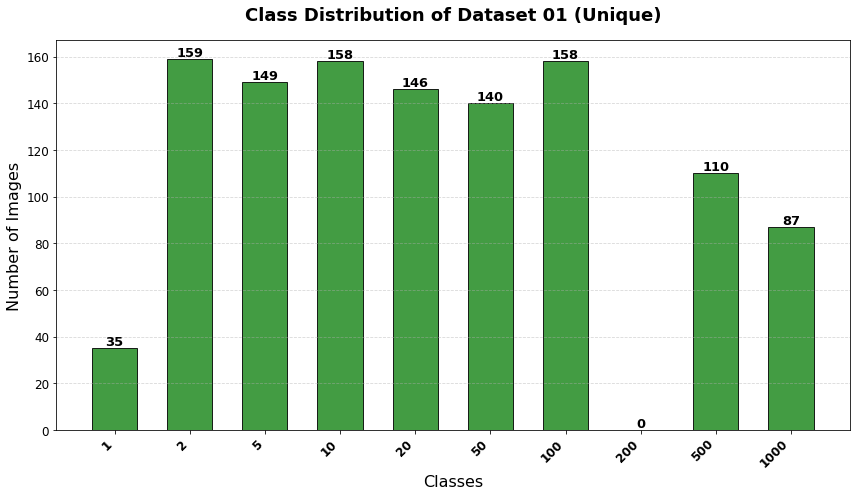

In [32]:
import os
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np
from pathlib import Path

def analyze_dataset(dataset_path):
    """
    Analyzes the dataset and prints comprehensive statistics
    """
    print("\n" + "="*50)
    print("Dataset Analysis Report")
    print("="*50)

    # 1. Basic Dataset Structure
    print(f"\nDataset Root Path: {dataset_path}")

    # Get all classes (subdirectories) and sort numerically, ignoring hidden directories (those starting with '.')
    classes = sorted(
        [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d)) and not d.startswith('.')],
        key=lambda x: float(x.replace('class', ''))  # Sort numerically
    )
    print(f"\nNumber of Classes: {len(classes)}")
    print("\nClasses:", ", ".join(classes))

    # 2. Class Distribution
    class_counts = {}
    total_images = 0

    for class_name in classes:  # Using sorted classes
        class_path = os.path.join(dataset_path, class_name)
        count = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
        class_counts[class_name] = count
        total_images += count
        print(f"{class_name}: {count} images")

    print(f"\nTotal number of images: {total_images}\n")

    # 3. Visualizations - Only Class Distribution
    # Set a minimal and clean style for professional appearance
    plt.style.use('seaborn-deep')
    sns.set_palette("husl")

    # Create figure with appropriate size for publication clarity
    plt.figure(figsize=(12, 7))

    # Create the bar plot with slightly translucent bars for visual distinction
    bars = plt.bar(class_counts.keys(), class_counts.values(), color='forestgreen', width=0.6, alpha=0.85, edgecolor='black')

    # Customize the appearance of labels and title for professional presentation
    plt.xticks(rotation=45, ha='right', fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12)
    plt.title('Class Distribution of Dataset 01 (Unique)', pad=20, fontsize=18, fontweight='bold')
    plt.ylabel('Number of Images', fontsize=16)
    plt.xlabel('Classes', fontsize=16)

    # Add value labels on top of each bar with consistent styling
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2., height,
            f'{int(height):,}',  # Thousand separator for better readability
            ha='center',
            va='bottom',
            fontsize=13,
            fontweight='bold',
            color='black'
        )

    # Add grid lines only for y-axis for clarity, with a light and non-intrusive style
    plt.grid(axis='y', linestyle='--', alpha=0.5)

    # Adjust layout to ensure no label is cut off
    plt.tight_layout()

    # Save the figure with high DPI for publication quality, use a vector format (e.g., .pdf) for better scaling
    plt.savefig('class_distribution_of_dataset_01_unique.png', dpi=300, bbox_inches='tight', format='png')

    # Display the plot
    plt.show()

    print("\n" + "="*50)

if __name__ == "__main__":
    dataset_path = "/scratch/movi/dm_project/data/dataset1_unique"
    analyze_dataset(dataset_path)



Dataset Comparison Analysis Report

Original Dataset Statistics:
Total images: 1,970
1: 121 images
2: 250 images
5: 250 images
10: 251 images
20: 210 images
50: 250 images
100: 245 images
200: 0 images
500: 173 images
1000: 220 images

Unique Dataset Statistics:
Total images: 1,142
1: 35 images
2: 159 images
5: 149 images
10: 158 images
20: 146 images
50: 140 images
100: 158 images
200: 0 images
500: 110 images
1000: 87 images


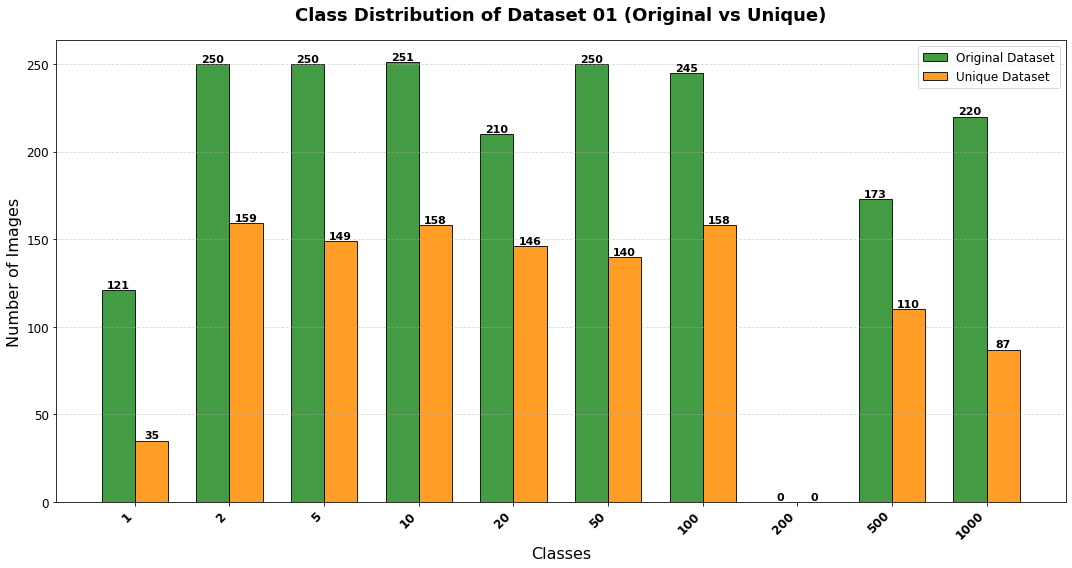

In [4]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

def analyze_datasets(original_path, unique_path):
    """
    Analyzes and compares the class distributions of original and unique datasets
    """
    print("\n" + "="*50)
    print("Dataset Comparison Analysis Report")
    print("="*50)

    # Get class counts for both datasets
    def get_class_counts(dataset_path):
        classes = sorted(
            [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d)) and not d.startswith('.')],
            key=lambda x: float(x.replace('class', ''))
        )
        
        class_counts = {}
        for class_name in classes:
            class_path = os.path.join(dataset_path, class_name)
            count = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
            class_counts[class_name] = count
        return class_counts

    original_counts = get_class_counts(original_path)
    unique_counts = get_class_counts(unique_path)

    # Set plot style
    plt.style.use('seaborn-deep')
    sns.set_palette("husl")

    # Create figure
    plt.figure(figsize=(15, 8))

    # Set bar positions
    classes = list(original_counts.keys())
    x = range(len(classes))
    width = 0.35

    # Create bars
    bars1 = plt.bar([i - width/2 for i in x], original_counts.values(), width, 
                    label='Original Dataset', color='forestgreen', alpha=0.85, edgecolor='black')
    bars2 = plt.bar([i + width/2 for i in x], unique_counts.values(), width, 
                    label='Unique Dataset', color='darkorange', alpha=0.85, edgecolor='black')

    # Customize appearance
    plt.title('Class Distribution of Dataset 01 (Original vs Unique)', pad=20, fontsize=18, fontweight='bold')
    plt.xlabel('Classes', fontsize=16)
    plt.ylabel('Number of Images', fontsize=16)
    plt.xticks([i for i in x], classes, rotation=45, ha='right', fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)

    # Add value labels on bars
    def add_value_labels(bars):
        for bar in bars:
            height = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center',
                va='bottom',
                fontsize=11,
                fontweight='bold',
                color='black'
            )

    add_value_labels(bars1)
    add_value_labels(bars2)

    # Add grid and adjust layout
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()

    # Save plot
    plt.savefig('class_distribution_comparison_d1.png', dpi=300, bbox_inches='tight', format='png')
    
    # Display statistics
    print("\nOriginal Dataset Statistics:")
    print(f"Total images: {sum(original_counts.values()):,}")
    for class_name, count in original_counts.items():
        print(f"{class_name}: {count:,} images")
        
    print("\nUnique Dataset Statistics:")
    print(f"Total images: {sum(unique_counts.values()):,}")
    for class_name, count in unique_counts.items():
        print(f"{class_name}: {count:,} images")

    # Display the plot
    plt.show()
    print("\n" + "="*50)

if __name__ == "__main__":
    original_dataset_path = "/scratch/movi/dm_project/data/dataset1"
    unique_dataset_path = "/scratch/movi/dm_project/data/dataset1_unique"
    analyze_datasets(original_dataset_path, unique_dataset_path)

# Dataset 02 Details

### Print Dataset 02 Details


Dataset Analysis Report

Dataset Root Path: /scratch/movi/dm_project/data/dataset2

Number of Classes: 10

Classes: 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000
1: 1000 images
2: 1000 images
5: 1000 images
10: 1000 images
20: 1000 images
50: 1000 images
100: 1000 images
200: 1000 images
500: 1000 images
1000: 1000 images

Total number of images: 10000



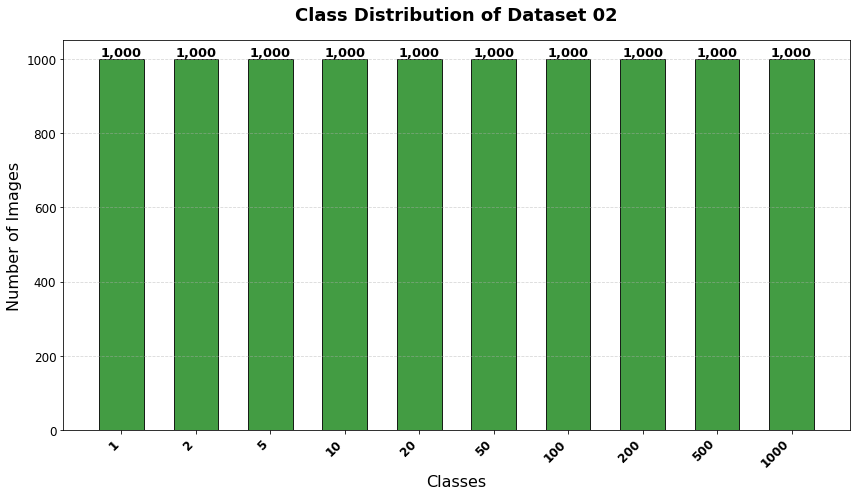

In [23]:
# Written by Ovi
# Code to analyze dataset statistics and distribution

import os
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np
from pathlib import Path

def analyze_dataset(dataset_path):
    """
    Analyzes the dataset and prints comprehensive statistics
    """
    print("\n" + "="*50)
    print("Dataset Analysis Report")
    print("="*50)

    # 1. Basic Dataset Structure
    print(f"\nDataset Root Path: {dataset_path}")

    # Get all classes (subdirectories) and sort numerically, ignoring hidden directories (those starting with '.')
    classes = sorted(
        [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d)) and not d.startswith('.')],
        key=lambda x: float(x.replace('class', ''))  # Sort numerically
    )
    print(f"\nNumber of Classes: {len(classes)}")
    print("\nClasses:", ", ".join(classes))

    # 2. Class Distribution
    class_counts = {}
    total_images = 0

    for class_name in classes:  # Using sorted classes
        class_path = os.path.join(dataset_path, class_name)
        count = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
        class_counts[class_name] = count
        total_images += count
        print(f"{class_name}: {count} images")

    print(f"\nTotal number of images: {total_images}\n")

    # 3. Visualizations - Only Class Distribution
    # Set a minimal and clean style for professional appearance
    plt.style.use('seaborn-deep')
    sns.set_palette("husl")

    # Create figure with appropriate size for publication clarity
    plt.figure(figsize=(12, 7))

    # Create the bar plot with slightly translucent bars for visual distinction
    bars = plt.bar(class_counts.keys(), class_counts.values(), color='forestgreen', width=0.6, alpha=0.85, edgecolor='black')

    # Customize the appearance of labels and title for professional presentation
    plt.xticks(rotation=45, ha='right', fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12)
    plt.title('Class Distribution of Dataset 02', pad=20, fontsize=18, fontweight='bold')
    plt.ylabel('Number of Images', fontsize=16)
    plt.xlabel('Classes', fontsize=16)

    # Add value labels on top of each bar with consistent styling
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2., height,
            f'{int(height):,}',  # Thousand separator for better readability
            ha='center',
            va='bottom',
            fontsize=13,
            fontweight='bold',
            color='black'
        )

    # Add grid lines only for y-axis for clarity, with a light and non-intrusive style
    plt.grid(axis='y', linestyle='--', alpha=0.5)

    # Adjust layout to ensure no label is cut off
    plt.tight_layout()

    # Save the figure with high DPI for publication quality, use a vector format (e.g., .pdf) for better scaling
    plt.savefig('class_distribution_of_dataset_02.png', dpi=300, bbox_inches='tight', format='png')

    # Display the plot
    plt.show()

    print("\n" + "="*50)

if __name__ == "__main__":
    dataset_path = "/scratch/movi/dm_project/data/dataset2"
    analyze_dataset(dataset_path)


### Find Unique Images From Dataset 02

In [24]:
import os
import imagehash
from PIL import Image
import shutil
from pathlib import Path
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm
import numpy as np
from collections import defaultdict

def calculate_phash(image_path):
    """Calculate perceptual hash of image using pHash algorithm"""
    try:
        with Image.open(image_path) as img:
            # Convert to grayscale to focus on structural similarity
            img = img.convert('L')
            # Calculate perceptual hash
            return str(imagehash.average_hash(img))
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

def find_similar_images(hash_dict, hash_value, threshold=5):
    """Find similar images within threshold hamming distance"""
    if not hash_value:
        return None

    for existing_hash in hash_dict:
        # Calculate hamming distance between hashes
        if sum(c1 != c2 for c1, c2 in zip(hash_value, existing_hash)) <= threshold:
            return existing_hash
    return None

def process_image(args):
    """Process single image for parallel execution"""
    file_path, destination_folder, class_folder = args
    hash_value = calculate_phash(file_path)
    return (file_path, hash_value, class_folder)

def save_unique_images(class_folder, destination_folder, threshold=5):
    """Find and save unique images using parallel processing"""
    image_hashes = {}
    duplicates = defaultdict(list)

    # Get list of all images
    image_files = []
    for root, _, files in os.walk(class_folder):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                file_path = os.path.join(root, file)
                image_files.append((file_path, destination_folder, class_folder))

    # Process images in parallel
    with ThreadPoolExecutor() as executor:
        results = list(tqdm(
            executor.map(process_image, image_files),
            total=len(image_files),
            desc=f"Processing {Path(class_folder).name}"
        ))

    # Process results and find duplicates
    for file_path, hash_value, class_folder in results:
        if hash_value:
            similar_hash = find_similar_images(image_hashes, hash_value, threshold)
            if similar_hash is None:
                # New unique image
                image_hashes[hash_value] = file_path
                # Copy to destination
                relative_path = os.path.relpath(file_path, class_folder)
                dest_path = os.path.join(destination_folder, relative_path)
                os.makedirs(os.path.dirname(dest_path), exist_ok=True)
                shutil.copy2(file_path, dest_path)
            else:
                # Duplicate found
                duplicates[image_hashes[similar_hash]].append(file_path)

    return len(image_files), len(image_hashes), duplicates

def main():
    # Directories
    source_folder = "/scratch/movi/dm_project/data/dataset2"
    destination_folder = "/scratch/movi/dm_project/data/dataset2_unique"
    os.makedirs(destination_folder, exist_ok=True)

    # Statistics
    overall_stats = {
        'total': 0,
        'unique': 0,
        'duplicates': 0
    }

    # Process each class
    for class_name in sorted(os.listdir(source_folder)):
        class_folder = os.path.join(source_folder, class_name)

        if os.path.isdir(class_folder):
            dest_class_folder = os.path.join(destination_folder, class_name)
            total, unique, duplicates = save_unique_images(class_folder, dest_class_folder)

            print(f"Class '{class_name}': Total images: {total}, Unique: {unique}, Duplicate: {len(duplicates)}")


            # Update overall stats
            overall_stats['total'] += total
            overall_stats['unique'] += unique
            overall_stats['duplicates'] += sum(len(dupes) for dupes in duplicates.values())

            print("-" * 50)

    # Print overall summary
    print("\nOverall Dataset Summary:")
    print(f"Total images: {overall_stats['total']}")
    print(f"Unique images: {overall_stats['unique']}")
    print(f"Duplicate images: {overall_stats['duplicates']}")

if __name__ == "__main__":
    main()

Processing 1: 100%|██████████| 1000/1000 [00:00<00:00, 9237.03it/s]


Class '1': Total images: 1000, Unique: 36, Duplicate: 36
--------------------------------------------------


Processing 10: 100%|██████████| 1000/1000 [00:00<00:00, 2355.00it/s]


Class '10': Total images: 1000, Unique: 134, Duplicate: 131
--------------------------------------------------


Processing 100: 100%|██████████| 1000/1000 [00:00<00:00, 2283.78it/s]


Class '100': Total images: 1000, Unique: 139, Duplicate: 132
--------------------------------------------------


Processing 1000: 100%|██████████| 1000/1000 [00:00<00:00, 2321.53it/s]


Class '1000': Total images: 1000, Unique: 76, Duplicate: 75
--------------------------------------------------


Processing 2: 100%|██████████| 1000/1000 [00:00<00:00, 2341.43it/s]


Class '2': Total images: 1000, Unique: 128, Duplicate: 123
--------------------------------------------------


Processing 20: 100%|██████████| 1000/1000 [00:00<00:00, 8812.40it/s]


Class '20': Total images: 1000, Unique: 130, Duplicate: 129
--------------------------------------------------


Processing 200: 100%|██████████| 1000/1000 [00:00<00:00, 2367.89it/s]


Class '200': Total images: 1000, Unique: 19, Duplicate: 19
--------------------------------------------------


Processing 5: 100%|██████████| 1000/1000 [00:00<00:00, 2314.76it/s]


Class '5': Total images: 1000, Unique: 121, Duplicate: 119
--------------------------------------------------


Processing 50: 100%|██████████| 1000/1000 [00:00<00:00, 2375.57it/s]


Class '50': Total images: 1000, Unique: 118, Duplicate: 115
--------------------------------------------------


Processing 500: 100%|██████████| 1000/1000 [00:00<00:00, 2328.11it/s]


Class '500': Total images: 1000, Unique: 91, Duplicate: 91
--------------------------------------------------

Overall Dataset Summary:
Total images: 10000
Unique images: 992
Duplicate images: 9008


### Print Dataset 02 Unique Details


Dataset Analysis Report

Dataset Root Path: /scratch/movi/dm_project/data/dataset2_unique

Number of Classes: 10

Classes: 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000
1: 36 images
2: 128 images
5: 121 images
10: 134 images
20: 130 images
50: 118 images
100: 139 images
200: 19 images
500: 91 images
1000: 76 images

Total number of images: 992



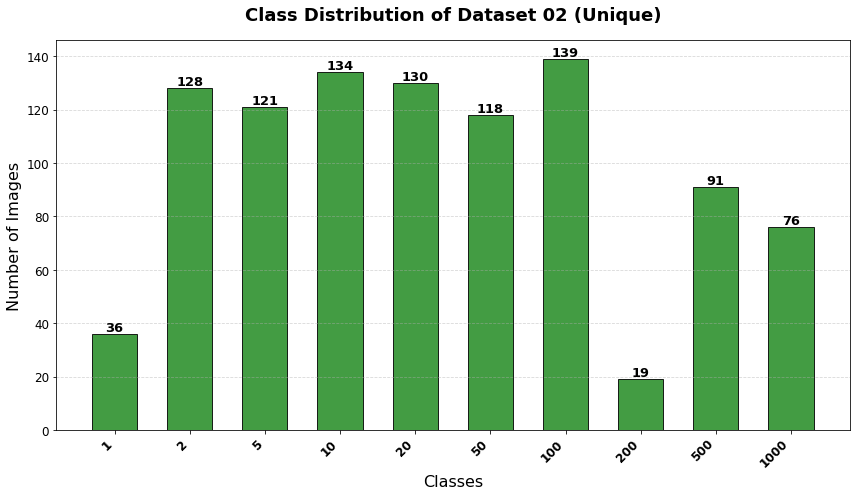

In [25]:
# Written by Ovi
# Code to analyze dataset statistics and distribution

import os
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np
from pathlib import Path

def analyze_dataset(dataset_path):
    """
    Analyzes the dataset and prints comprehensive statistics
    """
    print("\n" + "="*50)
    print("Dataset Analysis Report")
    print("="*50)

    # 1. Basic Dataset Structure
    print(f"\nDataset Root Path: {dataset_path}")

    # Get all classes (subdirectories) and sort numerically, ignoring hidden directories (those starting with '.')
    classes = sorted(
        [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d)) and not d.startswith('.')],
        key=lambda x: float(x.replace('class', ''))  # Sort numerically
    )
    print(f"\nNumber of Classes: {len(classes)}")
    print("\nClasses:", ", ".join(classes))

    # 2. Class Distribution
    class_counts = {}
    total_images = 0

    for class_name in classes:  # Using sorted classes
        class_path = os.path.join(dataset_path, class_name)
        count = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
        class_counts[class_name] = count
        total_images += count
        print(f"{class_name}: {count} images")

    print(f"\nTotal number of images: {total_images}\n")

    # 3. Visualizations - Only Class Distribution
    # Set a minimal and clean style for professional appearance
    plt.style.use('seaborn-deep')
    sns.set_palette("husl")

    # Create figure with appropriate size for publication clarity
    plt.figure(figsize=(12, 7))

    # Create the bar plot with slightly translucent bars for visual distinction
    bars = plt.bar(class_counts.keys(), class_counts.values(), color='forestgreen', width=0.6, alpha=0.85, edgecolor='black')

    # Customize the appearance of labels and title for professional presentation
    plt.xticks(rotation=45, ha='right', fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12)
    plt.title('Class Distribution of Dataset 02 (Unique)', pad=20, fontsize=18, fontweight='bold')
    plt.ylabel('Number of Images', fontsize=16)
    plt.xlabel('Classes', fontsize=16)

    # Add value labels on top of each bar with consistent styling
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2., height,
            f'{int(height):,}',  # Thousand separator for better readability
            ha='center',
            va='bottom',
            fontsize=13,
            fontweight='bold',
            color='black'
        )

    # Add grid lines only for y-axis for clarity, with a light and non-intrusive style
    plt.grid(axis='y', linestyle='--', alpha=0.5)

    # Adjust layout to ensure no label is cut off
    plt.tight_layout()

    # Save the figure with high DPI for publication quality, use a vector format (e.g., .pdf) for better scaling
    plt.savefig('class_distribution_of_dataset_02_unique.png', dpi=300, bbox_inches='tight', format='png')

    # Display the plot
    plt.show()

    print("\n" + "="*50)

if __name__ == "__main__":
    dataset_path = "/scratch/movi/dm_project/data/dataset2_unique"
    analyze_dataset(dataset_path)



Dataset Comparison Analysis Report

Original Dataset Statistics:
Total images: 10,000
1: 1,000 images
2: 1,000 images
5: 1,000 images
10: 1,000 images
20: 1,000 images
50: 1,000 images
100: 1,000 images
200: 1,000 images
500: 1,000 images
1000: 1,000 images

Unique Dataset Statistics:
Total images: 992
1: 36 images
2: 128 images
5: 121 images
10: 134 images
20: 130 images
50: 118 images
100: 139 images
200: 19 images
500: 91 images
1000: 76 images


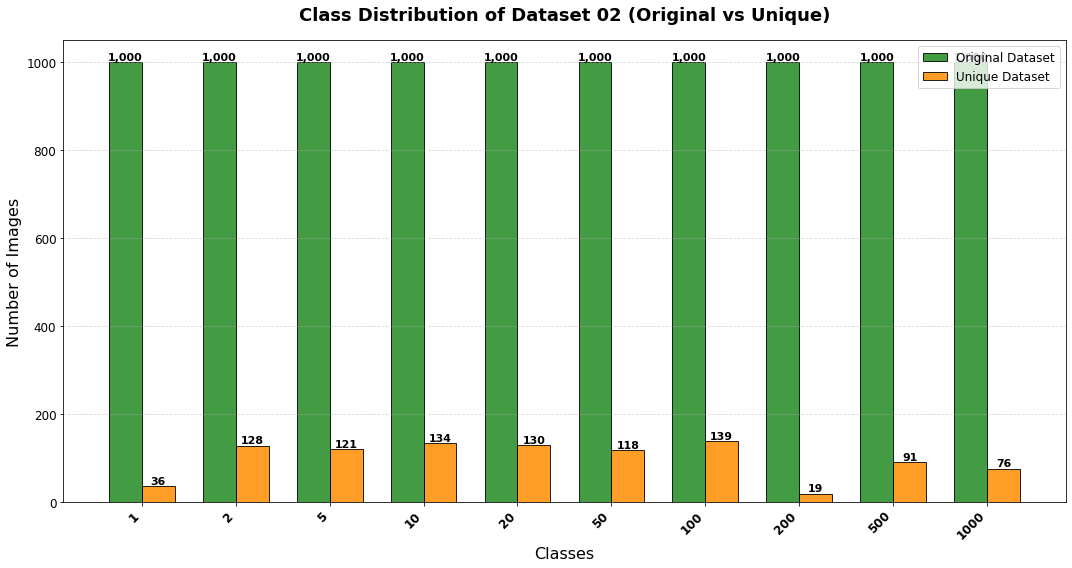

In [5]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

def analyze_datasets(original_path, unique_path):
    """
    Analyzes and compares the class distributions of original and unique datasets
    """
    print("\n" + "="*50)
    print("Dataset Comparison Analysis Report")
    print("="*50)

    # Get class counts for both datasets
    def get_class_counts(dataset_path):
        classes = sorted(
            [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d)) and not d.startswith('.')],
            key=lambda x: float(x.replace('class', ''))
        )
        
        class_counts = {}
        for class_name in classes:
            class_path = os.path.join(dataset_path, class_name)
            count = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
            class_counts[class_name] = count
        return class_counts

    original_counts = get_class_counts(original_path)
    unique_counts = get_class_counts(unique_path)

    # Set plot style
    plt.style.use('seaborn-deep')
    sns.set_palette("husl")

    # Create figure
    plt.figure(figsize=(15, 8))

    # Set bar positions
    classes = list(original_counts.keys())
    x = range(len(classes))
    width = 0.35

    # Create bars
    bars1 = plt.bar([i - width/2 for i in x], original_counts.values(), width, 
                    label='Original Dataset', color='forestgreen', alpha=0.85, edgecolor='black')
    bars2 = plt.bar([i + width/2 for i in x], unique_counts.values(), width, 
                    label='Unique Dataset', color='darkorange', alpha=0.85, edgecolor='black')

    # Customize appearance
    plt.title('Class Distribution of Dataset 02 (Original vs Unique)', pad=20, fontsize=18, fontweight='bold')
    plt.xlabel('Classes', fontsize=16)
    plt.ylabel('Number of Images', fontsize=16)
    plt.xticks([i for i in x], classes, rotation=45, ha='right', fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)

    # Add value labels on bars
    def add_value_labels(bars):
        for bar in bars:
            height = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center',
                va='bottom',
                fontsize=11,
                fontweight='bold',
                color='black'
            )

    add_value_labels(bars1)
    add_value_labels(bars2)

    # Add grid and adjust layout
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()

    # Save plot
    plt.savefig('class_distribution_comparison_d2.png', dpi=300, bbox_inches='tight', format='png')
    
    # Display statistics
    print("\nOriginal Dataset Statistics:")
    print(f"Total images: {sum(original_counts.values()):,}")
    for class_name, count in original_counts.items():
        print(f"{class_name}: {count:,} images")
        
    print("\nUnique Dataset Statistics:")
    print(f"Total images: {sum(unique_counts.values()):,}")
    for class_name, count in unique_counts.items():
        print(f"{class_name}: {count:,} images")

    # Display the plot
    plt.show()
    print("\n" + "="*50)

if __name__ == "__main__":
    original_dataset_path = "/scratch/movi/dm_project/data/dataset2"
    unique_dataset_path = "/scratch/movi/dm_project/data/dataset2_unique"
    analyze_datasets(original_dataset_path, unique_dataset_path)

# Dataset 03 Details

### Print Dataset 03 Details


Dataset Analysis Report

Dataset Root Path: /scratch/movi/dm_project/data/dataset3

Number of Classes: 10

Classes: 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000
1: 0 images
2: 5105 images
5: 6389 images
10: 8382 images
20: 14188 images
50: 9837 images
100: 6999 images
200: 0 images
500: 11927 images
1000: 7715 images

Total number of images: 70542



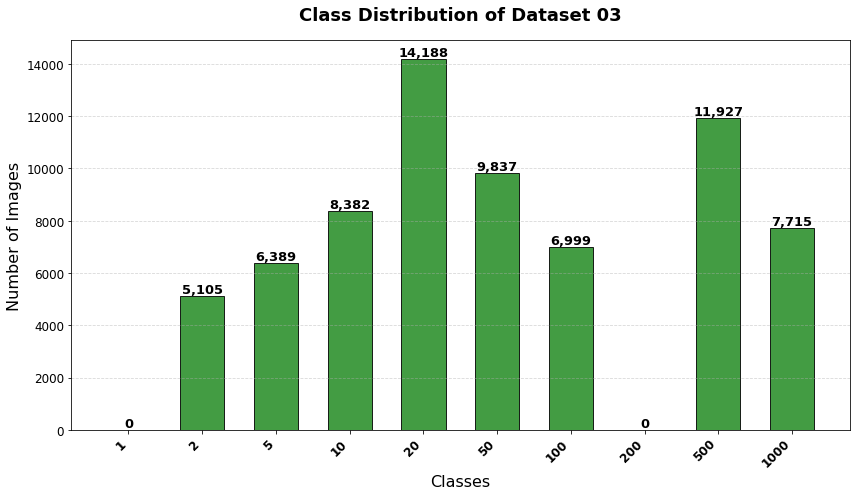

In [26]:
# Written by Ovi
# Code to analyze dataset statistics and distribution

import os
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np
from pathlib import Path

def analyze_dataset(dataset_path):
    """
    Analyzes the dataset and prints comprehensive statistics
    """
    print("\n" + "="*50)
    print("Dataset Analysis Report")
    print("="*50)

    # 1. Basic Dataset Structure
    print(f"\nDataset Root Path: {dataset_path}")

    # Get all classes (subdirectories) and sort numerically, ignoring hidden directories (those starting with '.')
    classes = sorted(
        [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d)) and not d.startswith('.')],
        key=lambda x: float(x.replace('class', ''))  # Sort numerically
    )
    print(f"\nNumber of Classes: {len(classes)}")
    print("\nClasses:", ", ".join(classes))

    # 2. Class Distribution
    class_counts = {}
    total_images = 0

    for class_name in classes:  # Using sorted classes
        class_path = os.path.join(dataset_path, class_name)
        count = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
        class_counts[class_name] = count
        total_images += count
        print(f"{class_name}: {count} images")

    print(f"\nTotal number of images: {total_images}\n")

    # 3. Visualizations - Only Class Distribution
    # Set a minimal and clean style for professional appearance
    plt.style.use('seaborn-deep')
    sns.set_palette("husl")

    # Create figure with appropriate size for publication clarity
    plt.figure(figsize=(12, 7))

    # Create the bar plot with slightly translucent bars for visual distinction
    bars = plt.bar(class_counts.keys(), class_counts.values(), color='forestgreen', width=0.6, alpha=0.85, edgecolor='black')

    # Customize the appearance of labels and title for professional presentation
    plt.xticks(rotation=45, ha='right', fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12)
    plt.title('Class Distribution of Dataset 03', pad=20, fontsize=18, fontweight='bold')
    plt.ylabel('Number of Images', fontsize=16)
    plt.xlabel('Classes', fontsize=16)

    # Add value labels on top of each bar with consistent styling
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2., height,
            f'{int(height):,}',  # Thousand separator for better readability
            ha='center',
            va='bottom',
            fontsize=13,
            fontweight='bold',
            color='black'
        )

    # Add grid lines only for y-axis for clarity, with a light and non-intrusive style
    plt.grid(axis='y', linestyle='--', alpha=0.5)

    # Adjust layout to ensure no label is cut off
    plt.tight_layout()

    # Save the figure with high DPI for publication quality, use a vector format (e.g., .pdf) for better scaling
    plt.savefig('class_distribution_of_dataset_03.png', dpi=300, bbox_inches='tight', format='png')

    # Display the plot
    plt.show()

    print("\n" + "="*50)

if __name__ == "__main__":
    dataset_path = "/scratch/movi/dm_project/data/dataset3"
    analyze_dataset(dataset_path)


### Find Unique Images From Dataset 03

In [27]:
import os
import imagehash
from PIL import Image
import shutil
from pathlib import Path
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm
import numpy as np
from collections import defaultdict

def calculate_phash(image_path):
    """Calculate perceptual hash of image using pHash algorithm"""
    try:
        with Image.open(image_path) as img:
            # Convert to grayscale to focus on structural similarity
            img = img.convert('L')
            # Calculate perceptual hash
            return str(imagehash.average_hash(img))
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

def find_similar_images(hash_dict, hash_value, threshold=5):
    """Find similar images within threshold hamming distance"""
    if not hash_value:
        return None

    for existing_hash in hash_dict:
        # Calculate hamming distance between hashes
        if sum(c1 != c2 for c1, c2 in zip(hash_value, existing_hash)) <= threshold:
            return existing_hash
    return None

def process_image(args):
    """Process single image for parallel execution"""
    file_path, destination_folder, class_folder = args
    hash_value = calculate_phash(file_path)
    return (file_path, hash_value, class_folder)

def save_unique_images(class_folder, destination_folder, threshold=5):
    """Find and save unique images using parallel processing"""
    image_hashes = {}
    duplicates = defaultdict(list)

    # Get list of all images
    image_files = []
    for root, _, files in os.walk(class_folder):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                file_path = os.path.join(root, file)
                image_files.append((file_path, destination_folder, class_folder))

    # Process images in parallel
    with ThreadPoolExecutor() as executor:
        results = list(tqdm(
            executor.map(process_image, image_files),
            total=len(image_files),
            desc=f"Processing {Path(class_folder).name}"
        ))

    # Process results and find duplicates
    for file_path, hash_value, class_folder in results:
        if hash_value:
            similar_hash = find_similar_images(image_hashes, hash_value, threshold)
            if similar_hash is None:
                # New unique image
                image_hashes[hash_value] = file_path
                # Copy to destination
                relative_path = os.path.relpath(file_path, class_folder)
                dest_path = os.path.join(destination_folder, relative_path)
                os.makedirs(os.path.dirname(dest_path), exist_ok=True)
                shutil.copy2(file_path, dest_path)
            else:
                # Duplicate found
                duplicates[image_hashes[similar_hash]].append(file_path)

    return len(image_files), len(image_hashes), duplicates

def main():
    # Directories
    source_folder = "/scratch/movi/dm_project/data/dataset3"
    destination_folder = "/scratch/movi/dm_project/data/dataset3_unique"
    os.makedirs(destination_folder, exist_ok=True)

    # Statistics
    overall_stats = {
        'total': 0,
        'unique': 0,
        'duplicates': 0
    }

    # Process each class
    for class_name in sorted(os.listdir(source_folder)):
        class_folder = os.path.join(source_folder, class_name)

        if os.path.isdir(class_folder):
            dest_class_folder = os.path.join(destination_folder, class_name)
            total, unique, duplicates = save_unique_images(class_folder, dest_class_folder)

            print(f"Class '{class_name}': Total images: {total}, Unique: {unique}, Duplicate: {len(duplicates)}")


            # Update overall stats
            overall_stats['total'] += total
            overall_stats['unique'] += unique
            overall_stats['duplicates'] += sum(len(dupes) for dupes in duplicates.values())

            print("-" * 50)

    # Print overall summary
    print("\nOverall Dataset Summary:")
    print(f"Total images: {overall_stats['total']}")
    print(f"Unique images: {overall_stats['unique']}")
    print(f"Duplicate images: {overall_stats['duplicates']}")

if __name__ == "__main__":
    main()

Processing 1: 0it [00:00, ?it/s]


Class '1': Total images: 0, Unique: 0, Duplicate: 0
--------------------------------------------------


Processing 10: 100%|██████████| 8382/8382 [00:01<00:00, 4437.46it/s] 


Class '10': Total images: 8382, Unique: 200, Duplicate: 189
--------------------------------------------------


Processing 100: 100%|██████████| 6999/6999 [00:03<00:00, 2097.15it/s] 


Class '100': Total images: 6999, Unique: 85, Duplicate: 82
--------------------------------------------------


Processing 1000: 100%|██████████| 7715/7715 [00:03<00:00, 2081.70it/s] 


Class '1000': Total images: 7715, Unique: 164, Duplicate: 159
--------------------------------------------------


Processing 2: 100%|██████████| 5105/5105 [00:00<00:00, 5644.16it/s] 


Class '2': Total images: 5105, Unique: 97, Duplicate: 91
--------------------------------------------------


Processing 20: 100%|██████████| 14188/14188 [00:08<00:00, 1697.30it/s]


Class '20': Total images: 14188, Unique: 217, Duplicate: 212
--------------------------------------------------


Processing 200: 0it [00:00, ?it/s]

Class '200': Total images: 0, Unique: 0, Duplicate: 0
--------------------------------------------------



Processing 5: 100%|██████████| 6389/6389 [00:01<00:00, 4009.92it/s] 


Class '5': Total images: 6389, Unique: 155, Duplicate: 142
--------------------------------------------------


Processing 50: 100%|██████████| 9837/9837 [00:05<00:00, 1918.59it/s] 


Class '50': Total images: 9837, Unique: 216, Duplicate: 207
--------------------------------------------------


Processing 500: 100%|██████████| 11927/11927 [00:06<00:00, 1812.90it/s]


Class '500': Total images: 11927, Unique: 187, Duplicate: 179
--------------------------------------------------

Overall Dataset Summary:
Total images: 70542
Unique images: 1321
Duplicate images: 69221


### Print Dataset 03 Unique Details


Dataset Analysis Report

Dataset Root Path: /scratch/movi/dm_project/data/dataset3_unique

Number of Classes: 10

Classes: 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000
1: 0 images
2: 97 images
5: 155 images
10: 200 images
20: 217 images
50: 216 images
100: 85 images
200: 0 images
500: 187 images
1000: 164 images

Total number of images: 1321



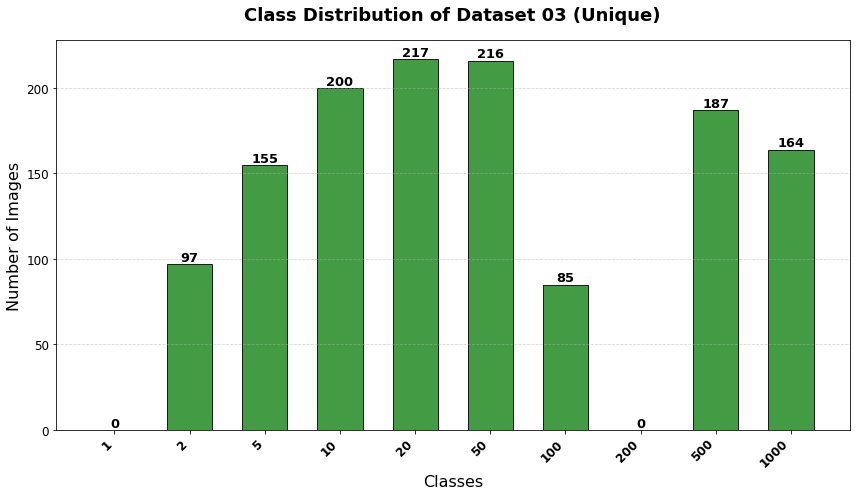

In [28]:
# Written by Ovi
# Code to analyze dataset statistics and distribution

import os
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np
from pathlib import Path

def analyze_dataset(dataset_path):
    """
    Analyzes the dataset and prints comprehensive statistics
    """
    print("\n" + "="*50)
    print("Dataset Analysis Report")
    print("="*50)

    # 1. Basic Dataset Structure
    print(f"\nDataset Root Path: {dataset_path}")

    # Get all classes (subdirectories) and sort numerically, ignoring hidden directories (those starting with '.')
    classes = sorted(
        [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d)) and not d.startswith('.')],
        key=lambda x: float(x.replace('class', ''))  # Sort numerically
    )
    print(f"\nNumber of Classes: {len(classes)}")
    print("\nClasses:", ", ".join(classes))

    # 2. Class Distribution
    class_counts = {}
    total_images = 0

    for class_name in classes:  # Using sorted classes
        class_path = os.path.join(dataset_path, class_name)
        count = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
        class_counts[class_name] = count
        total_images += count
        print(f"{class_name}: {count} images")

    print(f"\nTotal number of images: {total_images}\n")

    # 3. Visualizations - Only Class Distribution
    # Set a minimal and clean style for professional appearance
    plt.style.use('seaborn-deep')
    sns.set_palette("husl")

    # Create figure with appropriate size for publication clarity
    plt.figure(figsize=(12, 7))

    # Create the bar plot with slightly translucent bars for visual distinction
    bars = plt.bar(class_counts.keys(), class_counts.values(), color='forestgreen', width=0.6, alpha=0.85, edgecolor='black')

    # Customize the appearance of labels and title for professional presentation
    plt.xticks(rotation=45, ha='right', fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12)
    plt.title('Class Distribution of Dataset 03 (Unique)', pad=20, fontsize=18, fontweight='bold')
    plt.ylabel('Number of Images', fontsize=16)
    plt.xlabel('Classes', fontsize=16)

    # Add value labels on top of each bar with consistent styling
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2., height,
            f'{int(height):,}',  # Thousand separator for better readability
            ha='center',
            va='bottom',
            fontsize=13,
            fontweight='bold',
            color='black'
        )

    # Add grid lines only for y-axis for clarity, with a light and non-intrusive style
    plt.grid(axis='y', linestyle='--', alpha=0.5)

    # Adjust layout to ensure no label is cut off
    plt.tight_layout()

    # Save the figure with high DPI for publication quality, use a vector format (e.g., .pdf) for better scaling
    plt.savefig('class_distribution_of_dataset_03_unique.png', dpi=300, bbox_inches='tight', format='png')

    # Display the plot
    plt.show()

    print("\n" + "="*50)

if __name__ == "__main__":
    dataset_path = "/scratch/movi/dm_project/data/dataset3_unique"
    analyze_dataset(dataset_path)



Dataset Comparison Analysis Report

Original Dataset Statistics:
Total images: 70,542
1: 0 images
2: 5,105 images
5: 6,389 images
10: 8,382 images
20: 14,188 images
50: 9,837 images
100: 6,999 images
200: 0 images
500: 11,927 images
1000: 7,715 images

Unique Dataset Statistics:
Total images: 1,321
1: 0 images
2: 97 images
5: 155 images
10: 200 images
20: 217 images
50: 216 images
100: 85 images
200: 0 images
500: 187 images
1000: 164 images


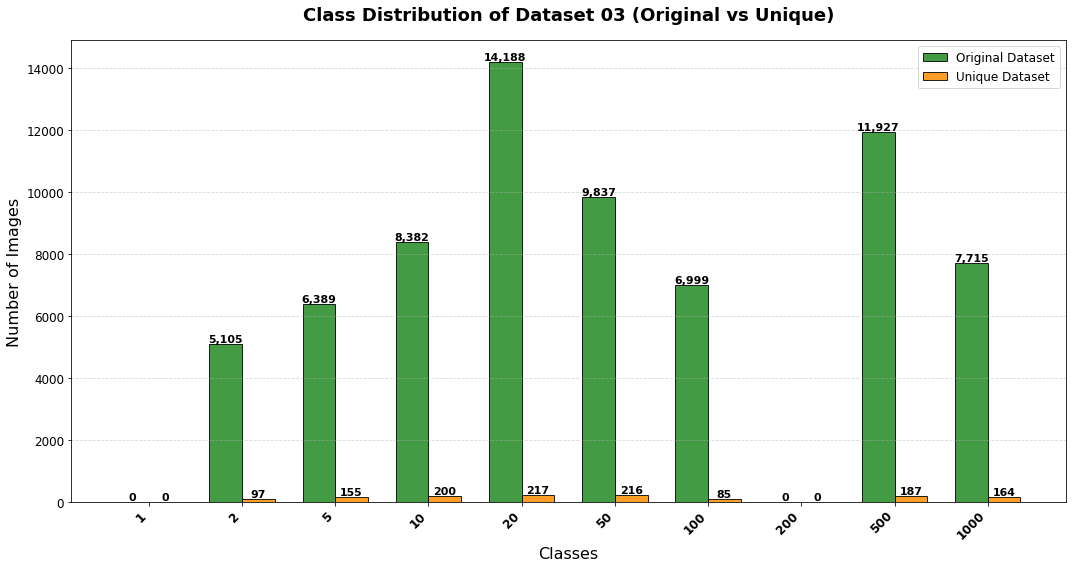

In [6]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

def analyze_datasets(original_path, unique_path):
    """
    Analyzes and compares the class distributions of original and unique datasets
    """
    print("\n" + "="*50)
    print("Dataset Comparison Analysis Report")
    print("="*50)

    # Get class counts for both datasets
    def get_class_counts(dataset_path):
        classes = sorted(
            [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d)) and not d.startswith('.')],
            key=lambda x: float(x.replace('class', ''))
        )
        
        class_counts = {}
        for class_name in classes:
            class_path = os.path.join(dataset_path, class_name)
            count = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
            class_counts[class_name] = count
        return class_counts

    original_counts = get_class_counts(original_path)
    unique_counts = get_class_counts(unique_path)

    # Set plot style
    plt.style.use('seaborn-deep')
    sns.set_palette("husl")

    # Create figure
    plt.figure(figsize=(15, 8))

    # Set bar positions
    classes = list(original_counts.keys())
    x = range(len(classes))
    width = 0.35

    # Create bars
    bars1 = plt.bar([i - width/2 for i in x], original_counts.values(), width, 
                    label='Original Dataset', color='forestgreen', alpha=0.85, edgecolor='black')
    bars2 = plt.bar([i + width/2 for i in x], unique_counts.values(), width, 
                    label='Unique Dataset', color='darkorange', alpha=0.85, edgecolor='black')

    # Customize appearance
    plt.title('Class Distribution of Dataset 03 (Original vs Unique)', pad=20, fontsize=18, fontweight='bold')
    plt.xlabel('Classes', fontsize=16)
    plt.ylabel('Number of Images', fontsize=16)
    plt.xticks([i for i in x], classes, rotation=45, ha='right', fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)

    # Add value labels on bars
    def add_value_labels(bars):
        for bar in bars:
            height = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center',
                va='bottom',
                fontsize=11,
                fontweight='bold',
                color='black'
            )

    add_value_labels(bars1)
    add_value_labels(bars2)

    # Add grid and adjust layout
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()

    # Save plot
    plt.savefig('class_distribution_comparison_d3.png', dpi=300, bbox_inches='tight', format='png')
    
    # Display statistics
    print("\nOriginal Dataset Statistics:")
    print(f"Total images: {sum(original_counts.values()):,}")
    for class_name, count in original_counts.items():
        print(f"{class_name}: {count:,} images")
        
    print("\nUnique Dataset Statistics:")
    print(f"Total images: {sum(unique_counts.values()):,}")
    for class_name, count in unique_counts.items():
        print(f"{class_name}: {count:,} images")

    # Display the plot
    plt.show()
    print("\n" + "="*50)

if __name__ == "__main__":
    original_dataset_path = "/scratch/movi/dm_project/data/dataset3"
    unique_dataset_path = "/scratch/movi/dm_project/data/dataset3_unique"
    analyze_datasets(original_dataset_path, unique_dataset_path)

# Dataset Combined Details

### Combine 3 Datasets

In [ ]:
# Written by Ovi, 2024-11-03
# Code to merge multiple datasets into one combined dataset

import os
import shutil
from pathlib import Path
from tqdm import tqdm

def merge_datasets(source_folders, destination_folder):
    """
    Merge multiple datasets into one combined dataset maintaining class structure
    
    Args:
        source_folders: List of paths to source dataset folders
        destination_folder: Path to the destination combined dataset folder
    """
    print("\n" + "="*50)
    print("Dataset Merging Process")
    print("="*50)

    # Create destination folder if it doesn't exist
    os.makedirs(destination_folder, exist_ok=True)
    
    # Dictionary to keep track of counts
    class_counts = {}
    dataset_counts = {os.path.basename(src): {} for src in source_folders}
    
    # First, verify all datasets have the same class structure
    first_dataset_classes = sorted(os.listdir(source_folders[0]))
    for src in source_folders:
        current_classes = sorted(os.listdir(src))
        if current_classes != first_dataset_classes:
            raise ValueError(f"Dataset {src} has different classes than the first dataset")
    
    # Create class folders in destination
    for class_name in first_dataset_classes:
        os.makedirs(os.path.join(destination_folder, class_name), exist_ok=True)
        class_counts[class_name] = 0
    
    # Copy files from each source dataset
    for src in source_folders:
        dataset_name = os.path.basename(src)
        print(f"\nProcessing dataset: {dataset_name}")
        
        # Process each class
        for class_name in first_dataset_classes:
            src_class_path = os.path.join(src, class_name)
            dst_class_path = os.path.join(destination_folder, class_name)
            
            # Get list of files to copy
            files = [f for f in os.listdir(src_class_path) if os.path.isfile(os.path.join(src_class_path, f))]
            dataset_counts[dataset_name][class_name] = len(files)
            
            # Copy files with progress bar
            print(f"Copying {class_name} ({len(files)} files)")
            for file in tqdm(files, desc=f"{class_name}"):
                src_file = os.path.join(src_class_path, file)
                # Create unique filename to avoid conflicts
                file_base, file_ext = os.path.splitext(file)
                dst_file = os.path.join(dst_class_path, f"{file_base}_{dataset_name}{file_ext}")
                
                shutil.copy2(src_file, dst_file)
                class_counts[class_name] += 1
    
    # Print summary
    print("\n" + "="*50)
    print("Merge Summary")
    print("="*50)
    
    # Per dataset statistics
    print("\nPer Dataset Statistics:")
    for dataset_name, counts in dataset_counts.items():
        print(f"\n{dataset_name}:")
        total = 0
        for class_name, count in counts.items():
            print(f"  {class_name}: {count} images")
            total += count
        print(f"  Total: {total} images")
    
    # Combined dataset statistics
    print("\nCombined Dataset Statistics:")
    total_images = 0
    for class_name, count in class_counts.items():
        print(f"{class_name}: {count} images")
        total_images += count
    
    print(f"\nTotal images in combined dataset: {total_images}")
    print("="*50)

# Example usage
if __name__ == "__main__":
    # Define source and destination paths
    source_datasets = [
        "/scratch/movi/dm_project/data/dataset1",
        "/scratch/movi/dm_project/data/dataset2",
        "/scratch/movi/dm_project/data/dataset3"
    ]
    
    destination = "/scratch/movi/dm_project/data/dataset_combined"
    
    # Merge the datasets
    merge_datasets(source_datasets, destination)

### Print Combined Dataset Details


Dataset Analysis Report

Dataset Root Path: /scratch/movi/dm_project/data/dataset_combined

Number of Classes: 10

Classes: 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000
1: 1121 images
2: 6355 images
5: 7639 images
10: 9633 images
20: 15398 images
50: 11087 images
100: 8244 images
200: 1000 images
500: 13100 images
1000: 8935 images

Total number of images: 82512



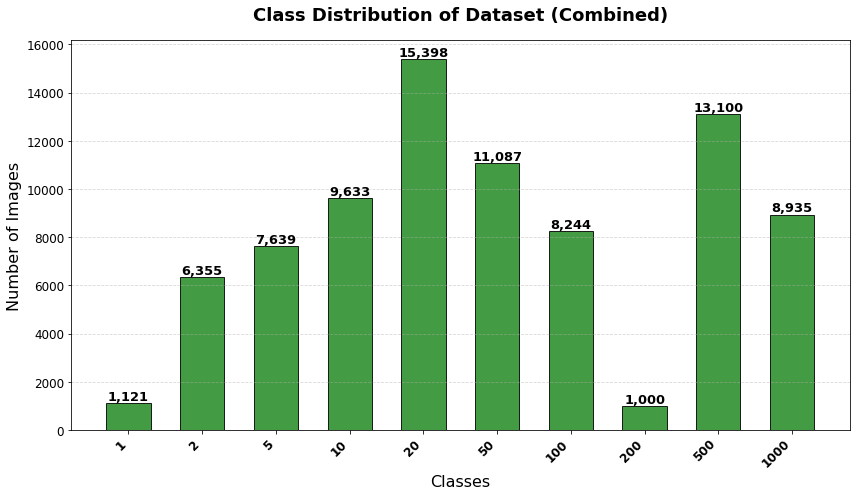

In [29]:
# Written by Ovi
# Code to analyze dataset statistics and distribution

import os
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np
from pathlib import Path

def analyze_dataset(dataset_path):
    """
    Analyzes the dataset and prints comprehensive statistics
    """
    print("\n" + "="*50)
    print("Dataset Analysis Report")
    print("="*50)

    # 1. Basic Dataset Structure
    print(f"\nDataset Root Path: {dataset_path}")

    # Get all classes (subdirectories) and sort numerically, ignoring hidden directories (those starting with '.')
    classes = sorted(
        [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d)) and not d.startswith('.')],
        key=lambda x: float(x.replace('class', ''))  # Sort numerically
    )
    print(f"\nNumber of Classes: {len(classes)}")
    print("\nClasses:", ", ".join(classes))

    # 2. Class Distribution
    class_counts = {}
    total_images = 0

    for class_name in classes:  # Using sorted classes
        class_path = os.path.join(dataset_path, class_name)
        count = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
        class_counts[class_name] = count
        total_images += count
        print(f"{class_name}: {count} images")

    print(f"\nTotal number of images: {total_images}\n")

    # 3. Visualizations - Only Class Distribution
    # Set a minimal and clean style for professional appearance
    plt.style.use('seaborn-deep')
    sns.set_palette("husl")

    # Create figure with appropriate size for publication clarity
    plt.figure(figsize=(12, 7))

    # Create the bar plot with slightly translucent bars for visual distinction
    bars = plt.bar(class_counts.keys(), class_counts.values(), color='forestgreen', width=0.6, alpha=0.85, edgecolor='black')

    # Customize the appearance of labels and title for professional presentation
    plt.xticks(rotation=45, ha='right', fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12)
    plt.title('Class Distribution of Dataset (Combined)', pad=20, fontsize=18, fontweight='bold')
    plt.ylabel('Number of Images', fontsize=16)
    plt.xlabel('Classes', fontsize=16)

    # Add value labels on top of each bar with consistent styling
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2., height,
            f'{int(height):,}',  # Thousand separator for better readability
            ha='center',
            va='bottom',
            fontsize=13,
            fontweight='bold',
            color='black'
        )

    # Add grid lines only for y-axis for clarity, with a light and non-intrusive style
    plt.grid(axis='y', linestyle='--', alpha=0.5)

    # Adjust layout to ensure no label is cut off
    plt.tight_layout()

    # Save the figure with high DPI for publication quality, use a vector format (e.g., .pdf) for better scaling
    plt.savefig('class_distribution_of_dataset_combined.png', dpi=300, bbox_inches='tight', format='png')

    # Display the plot
    plt.show()

    print("\n" + "="*50)

if __name__ == "__main__":
    dataset_path = "/scratch/movi/dm_project/data/dataset_combined"
    analyze_dataset(dataset_path)


### Find Unique Images From The Combined Dataset

In [30]:
import os
import imagehash
from PIL import Image
import shutil
from pathlib import Path
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm
import numpy as np
from collections import defaultdict

def calculate_phash(image_path):
    """Calculate perceptual hash of image using pHash algorithm"""
    try:
        with Image.open(image_path) as img:
            # Convert to grayscale to focus on structural similarity
            img = img.convert('L')
            # Calculate perceptual hash
            return str(imagehash.average_hash(img))
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

def find_similar_images(hash_dict, hash_value, threshold=5):
    """Find similar images within threshold hamming distance"""
    if not hash_value:
        return None

    for existing_hash in hash_dict:
        # Calculate hamming distance between hashes
        if sum(c1 != c2 for c1, c2 in zip(hash_value, existing_hash)) <= threshold:
            return existing_hash
    return None

def process_image(args):
    """Process single image for parallel execution"""
    file_path, destination_folder, class_folder = args
    hash_value = calculate_phash(file_path)
    return (file_path, hash_value, class_folder)

def save_unique_images(class_folder, destination_folder, threshold=5):
    """Find and save unique images using parallel processing"""
    image_hashes = {}
    duplicates = defaultdict(list)

    # Get list of all images
    image_files = []
    for root, _, files in os.walk(class_folder):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                file_path = os.path.join(root, file)
                image_files.append((file_path, destination_folder, class_folder))

    # Process images in parallel
    with ThreadPoolExecutor() as executor:
        results = list(tqdm(
            executor.map(process_image, image_files),
            total=len(image_files),
            desc=f"Processing {Path(class_folder).name}"
        ))

    # Process results and find duplicates
    for file_path, hash_value, class_folder in results:
        if hash_value:
            similar_hash = find_similar_images(image_hashes, hash_value, threshold)
            if similar_hash is None:
                # New unique image
                image_hashes[hash_value] = file_path
                # Copy to destination
                relative_path = os.path.relpath(file_path, class_folder)
                dest_path = os.path.join(destination_folder, relative_path)
                os.makedirs(os.path.dirname(dest_path), exist_ok=True)
                shutil.copy2(file_path, dest_path)
            else:
                # Duplicate found
                duplicates[image_hashes[similar_hash]].append(file_path)

    return len(image_files), len(image_hashes), duplicates

def main():
    # Directories
    source_folder = "/scratch/movi/dm_project/data/dataset_combined"
    destination_folder = "/scratch/movi/dm_project/data/dataset_combined_unique"
    os.makedirs(destination_folder, exist_ok=True)

    # Statistics
    overall_stats = {
        'total': 0,
        'unique': 0,
        'duplicates': 0
    }

    # Process each class
    for class_name in sorted(os.listdir(source_folder)):
        class_folder = os.path.join(source_folder, class_name)

        if os.path.isdir(class_folder):
            dest_class_folder = os.path.join(destination_folder, class_name)
            total, unique, duplicates = save_unique_images(class_folder, dest_class_folder)

            print(f"Class '{class_name}': Total images: {total}, Unique: {unique}, Duplicate: {len(duplicates)}")


            # Update overall stats
            overall_stats['total'] += total
            overall_stats['unique'] += unique
            overall_stats['duplicates'] += sum(len(dupes) for dupes in duplicates.values())

            print("-" * 50)

    # Print overall summary
    print("\nOverall Dataset Summary:")
    print(f"Total images: {overall_stats['total']}")
    print(f"Unique images: {overall_stats['unique']}")
    print(f"Duplicate images: {overall_stats['duplicates']}")

if __name__ == "__main__":
    main()

Processing 1: 100%|██████████| 1121/1121 [00:00<00:00, 2272.54it/s]


Class '1': Total images: 1121, Unique: 36, Duplicate: 36
--------------------------------------------------


Processing 10: 100%|██████████| 9633/9633 [00:05<00:00, 1695.44it/s]


Class '10': Total images: 9633, Unique: 355, Duplicate: 325
--------------------------------------------------


Processing 100: 100%|██████████| 8244/8244 [00:01<00:00, 4718.08it/s] 


Class '100': Total images: 8244, Unique: 246, Duplicate: 221
--------------------------------------------------


Processing 1000: 100%|██████████| 8935/8935 [00:03<00:00, 2402.00it/s] 


Class '1000': Total images: 8935, Unique: 250, Duplicate: 242
--------------------------------------------------


Processing 2: 100%|██████████| 6355/6355 [00:03<00:00, 1691.75it/s]


Class '2': Total images: 6355, Unique: 264, Duplicate: 228
--------------------------------------------------


Processing 20: 100%|██████████| 15398/15398 [00:07<00:00, 2157.96it/s]


Class '20': Total images: 15398, Unique: 362, Duplicate: 338
--------------------------------------------------


Processing 200: 100%|██████████| 1000/1000 [00:00<00:00, 2382.47it/s]


Class '200': Total images: 1000, Unique: 19, Duplicate: 19
--------------------------------------------------


Processing 5: 100%|██████████| 7639/7639 [00:02<00:00, 3370.82it/s] 


Class '5': Total images: 7639, Unique: 297, Duplicate: 262
--------------------------------------------------


Processing 50: 100%|██████████| 11087/11087 [00:04<00:00, 2414.20it/s]


Class '50': Total images: 11087, Unique: 355, Duplicate: 326
--------------------------------------------------


Processing 500: 100%|██████████| 13100/13100 [00:05<00:00, 2293.62it/s]


Class '500': Total images: 13100, Unique: 298, Duplicate: 273
--------------------------------------------------

Overall Dataset Summary:
Total images: 82512
Unique images: 2482
Duplicate images: 80030


### Print Dataset Combined Unique Details


Dataset Analysis Report

Dataset Root Path: /scratch/movi/dm_project/data/dataset_combined_unique

Number of Classes: 10

Classes: 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000
1: 36 images
2: 264 images
5: 297 images
10: 355 images
20: 362 images
50: 355 images
100: 246 images
200: 19 images
500: 298 images
1000: 250 images

Total number of images: 2482



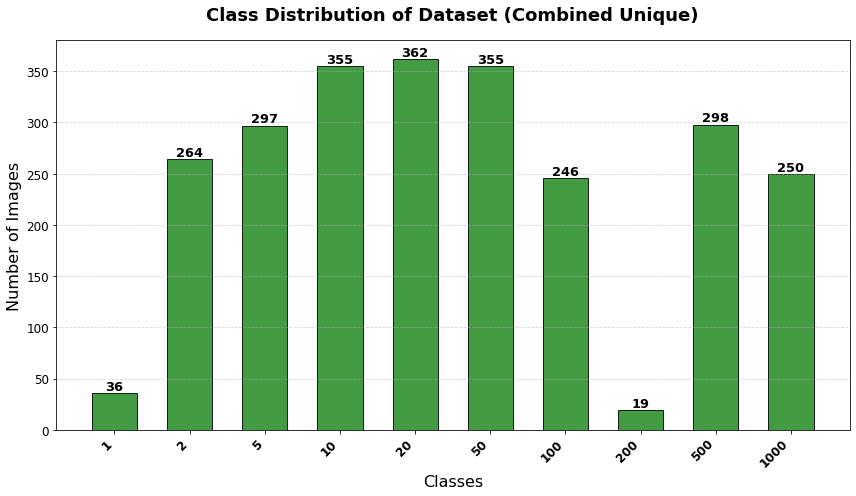

In [31]:
# Written by Ovi
# Code to analyze dataset statistics and distribution

import os
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np
from pathlib import Path

def analyze_dataset(dataset_path):
    """
    Analyzes the dataset and prints comprehensive statistics
    """
    print("\n" + "="*50)
    print("Dataset Analysis Report")
    print("="*50)

    # 1. Basic Dataset Structure
    print(f"\nDataset Root Path: {dataset_path}")

    # Get all classes (subdirectories) and sort numerically, ignoring hidden directories (those starting with '.')
    classes = sorted(
        [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d)) and not d.startswith('.')],
        key=lambda x: float(x.replace('class', ''))  # Sort numerically
    )
    print(f"\nNumber of Classes: {len(classes)}")
    print("\nClasses:", ", ".join(classes))

    # 2. Class Distribution
    class_counts = {}
    total_images = 0

    for class_name in classes:  # Using sorted classes
        class_path = os.path.join(dataset_path, class_name)
        count = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
        class_counts[class_name] = count
        total_images += count
        print(f"{class_name}: {count} images")

    print(f"\nTotal number of images: {total_images}\n")

    # 3. Visualizations - Only Class Distribution
    # Set a minimal and clean style for professional appearance
    plt.style.use('seaborn-deep')
    sns.set_palette("husl")

    # Create figure with appropriate size for publication clarity
    plt.figure(figsize=(12, 7))

    # Create the bar plot with slightly translucent bars for visual distinction
    bars = plt.bar(class_counts.keys(), class_counts.values(), color='forestgreen', width=0.6, alpha=0.85, edgecolor='black')

    # Customize the appearance of labels and title for professional presentation
    plt.xticks(rotation=45, ha='right', fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12)
    plt.title('Class Distribution of Dataset (Combined Unique)', pad=20, fontsize=18, fontweight='bold')
    plt.ylabel('Number of Images', fontsize=16)
    plt.xlabel('Classes', fontsize=16)

    # Add value labels on top of each bar with consistent styling
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2., height,
            f'{int(height):,}',  # Thousand separator for better readability
            ha='center',
            va='bottom',
            fontsize=13,
            fontweight='bold',
            color='black'
        )

    # Add grid lines only for y-axis for clarity, with a light and non-intrusive style
    plt.grid(axis='y', linestyle='--', alpha=0.5)

    # Adjust layout to ensure no label is cut off
    plt.tight_layout()

    # Save the figure with high DPI for publication quality, use a vector format (e.g., .pdf) for better scaling
    plt.savefig('class_distribution_of_dataset_combined_unique.png', dpi=300, bbox_inches='tight', format='png')

    # Display the plot
    plt.show()

    print("\n" + "="*50)

if __name__ == "__main__":
    dataset_path = "/scratch/movi/dm_project/data/dataset_combined_unique"
    analyze_dataset(dataset_path)



Dataset Comparison Analysis Report

Original Dataset Statistics:
Total images: 82,512
1: 1,121 images
2: 6,355 images
5: 7,639 images
10: 9,633 images
20: 15,398 images
50: 11,087 images
100: 8,244 images
200: 1,000 images
500: 13,100 images
1000: 8,935 images

Unique Dataset Statistics:
Total images: 2,482
1: 36 images
2: 264 images
5: 297 images
10: 355 images
20: 362 images
50: 355 images
100: 246 images
200: 19 images
500: 298 images
1000: 250 images


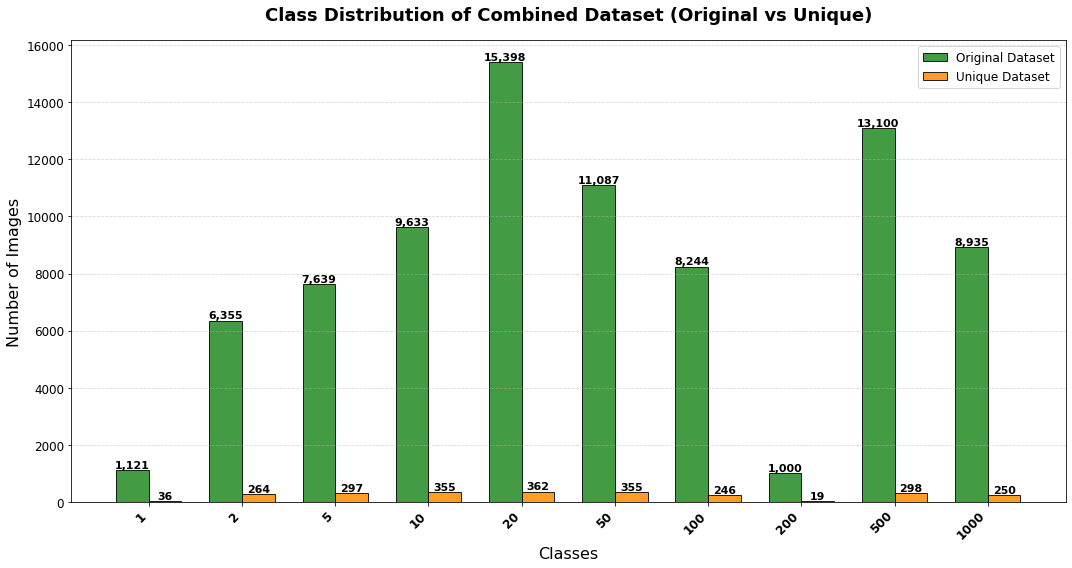

In [7]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

def analyze_datasets(original_path, unique_path):
    """
    Analyzes and compares the class distributions of original and unique datasets
    """
    print("\n" + "="*50)
    print("Dataset Comparison Analysis Report")
    print("="*50)

    # Get class counts for both datasets
    def get_class_counts(dataset_path):
        classes = sorted(
            [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d)) and not d.startswith('.')],
            key=lambda x: float(x.replace('class', ''))
        )
        
        class_counts = {}
        for class_name in classes:
            class_path = os.path.join(dataset_path, class_name)
            count = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
            class_counts[class_name] = count
        return class_counts

    original_counts = get_class_counts(original_path)
    unique_counts = get_class_counts(unique_path)

    # Set plot style
    plt.style.use('seaborn-deep')
    sns.set_palette("husl")

    # Create figure
    plt.figure(figsize=(15, 8))

    # Set bar positions
    classes = list(original_counts.keys())
    x = range(len(classes))
    width = 0.35

    # Create bars
    bars1 = plt.bar([i - width/2 for i in x], original_counts.values(), width, 
                    label='Original Dataset', color='forestgreen', alpha=0.85, edgecolor='black')
    bars2 = plt.bar([i + width/2 for i in x], unique_counts.values(), width, 
                    label='Unique Dataset', color='darkorange', alpha=0.85, edgecolor='black')

    # Customize appearance
    plt.title('Class Distribution of Combined Dataset (Original vs Unique)', pad=20, fontsize=18, fontweight='bold')
    plt.xlabel('Classes', fontsize=16)
    plt.ylabel('Number of Images', fontsize=16)
    plt.xticks([i for i in x], classes, rotation=45, ha='right', fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)

    # Add value labels on bars
    def add_value_labels(bars):
        for bar in bars:
            height = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center',
                va='bottom',
                fontsize=11,
                fontweight='bold',
                color='black'
            )

    add_value_labels(bars1)
    add_value_labels(bars2)

    # Add grid and adjust layout
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()

    # Save plot
    plt.savefig('class_distribution_comparison_d4.png', dpi=300, bbox_inches='tight', format='png')
    
    # Display statistics
    print("\nOriginal Dataset Statistics:")
    print(f"Total images: {sum(original_counts.values()):,}")
    for class_name, count in original_counts.items():
        print(f"{class_name}: {count:,} images")
        
    print("\nUnique Dataset Statistics:")
    print(f"Total images: {sum(unique_counts.values()):,}")
    for class_name, count in unique_counts.items():
        print(f"{class_name}: {count:,} images")

    # Display the plot
    plt.show()
    print("\n" + "="*50)

if __name__ == "__main__":
    original_dataset_path = "/scratch/movi/dm_project/data/dataset_combined"
    unique_dataset_path = "/scratch/movi/dm_project/data/dataset_combined_unique"
    analyze_datasets(original_dataset_path, unique_dataset_path)

## extra

In [ ]:
# import shutil
# import os

# # Move the kaggle.json file to ~/.kaggle
# os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)
# shutil.copy("/scratch/movi/dm_project/kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))
# os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)


In [ ]:
# !pip install kaggle

In [ ]:
# !kaggle --version

In [ ]:
# import os
# os.environ["PATH"] += os.pathsep + "/home/movi/.local/bin"

In [ ]:
# !kaggle datasets download rahnumatasnim1604103/bangladeshi-banknote-dataset

In [ ]:
# import zipfile
# import os

# # Define paths
# zip_path = "/scratch/movi/dm_project/bangladeshi-banknote-dataset.zip"
# extract_path = "/scratch/movi/dm_project"

# # Ensure the target directory exists
# os.makedirs(extract_path, exist_ok=True)

# # Unzip the downloaded file into the specified directory
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_path)

# # # Optionally, delete the zip file after extraction
# # os.remove(zip_path)

In [ ]:
# # Written by Ovi, 2024-11-01
# # Code to categorize files by prefix in filenames and save into subfolders

# import os
# import shutil
# import re

# # Path to the dataset containing all files
# source_dir = "/scratch/movi/dm_project/dataset"
# # Path to the directory where categorized subfolders will be created
# destination_dir = "/scratch/movi/dm_project/dataset3"

# # Ensure the destination directory exists
# os.makedirs(destination_dir, exist_ok=True)

# # Regular expression to capture the numeric class prefix from filenames
# pattern = re.compile(r'^(\d+)')  # Captures numeric prefix at the start of each file name

# # Process each file in the source directory
# for file_name in os.listdir(source_dir):
#     file_path = os.path.join(source_dir, file_name)
    
#     if os.path.isfile(file_path):
#         # Match the pattern to get the class identifier
#         match = pattern.match(file_name)
        
#         if match:
#             class_name = match.group(1)  # Extract the numeric identifier (e.g., '2', '10', '100')
#             class_folder = os.path.join(destination_dir, class_name)  # Folder for this class
            
#             # Ensure the class folder exists
#             os.makedirs(class_folder, exist_ok=True)
            
#             # Move the file to the appropriate class folder
#             shutil.move(file_path, os.path.join(class_folder, file_name))

# # Summary output
# print(f"Files have been organized into subfolders based on their class prefixes in '{destination_dir}'")


In [ ]:
# import os

# # Path to the main dataset directory containing class folders
# dataset_dir = '/scratch/movi/dm_project/dataset3'  # Replace with your actual path

# def count_images_in_folders(dataset_dir):
#     image_counts = {}  # Dictionary to store folder names and image counts
#     total_images = 0   # To store the total image count

#     # Loop through folders and count images
#     for folder_name in sorted(os.listdir(dataset_dir)):  # Alphabetical order
#         folder_path = os.path.join(dataset_dir, folder_name)

#         if os.path.isdir(folder_path):  # Ensure it's a folder, not a file
#             image_count = len([f for f in os.listdir(folder_path) 
#                                if os.path.isfile(os.path.join(folder_path, f))])
#             image_counts[folder_name] = image_count  # Store in dictionary
#             total_images += image_count  # Increment total image count
#             print(f"{folder_name}: total {image_count} images")

#     # Store total image count in the dictionary
#     image_counts["Total"] = total_images
#     print(f"\nTotal: {total_images} images")

#     return image_counts

# # Run the function and store the results in a dictionary
# image_counts_dict = count_images_in_folders(dataset_dir)

# # Optional: Print the dictionary if needed
# print("\nStored Image Counts Dictionary:", image_counts_dict)

Saved combined grid image at 'combined_grid.png'


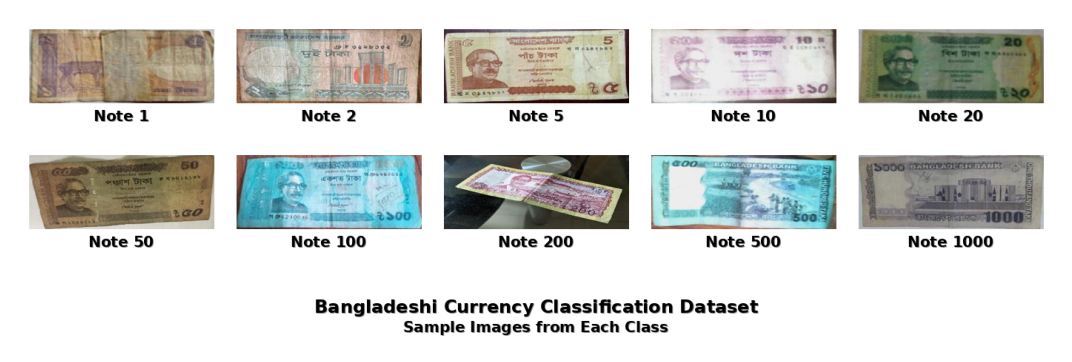

In [48]:
# Written by Ovi, 2024-11-07
# Generate a grid of landscape-oriented images with class captions
import os
import random
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import re

def natural_sort_key(s):
    """Function to sort strings with numbers naturally"""
    return [int(text) if text.isdigit() else text.lower()
            for text in re.split('([0-9]+)', s)]

def generate_and_display_combined_grid_image(
    dataset_path='/scratch/movi/dm_project/data/dataset2',
    output_file='combined_grid.png',
    grid_size=(2, 5),
    image_size=(250, 100),  # Width is larger than height for landscape
    padding=30,
    caption_padding=40
):
    # Verify and get class directories
    class_dirs = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]
    # Sort class directories numerically
    class_dirs.sort(key=natural_sort_key)
    
    if len(class_dirs) < grid_size[0] * grid_size[1]:
        print("Not enough classes to fill the entire grid.")
        return

    selected_images = []
    class_names = []
    
    # Select and process images
    for class_name in class_dirs:
        class_path = os.path.join(dataset_path, class_name)
        images = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
        
        if not images:
            print(f"No images found in class '{class_name}', skipping.")
            continue
            
        # Select and process one random image
        random_image_path = os.path.join(class_path, random.choice(images))
        # Open and resize image to landscape orientation
        image = Image.open(random_image_path)
        # Ensure landscape orientation
        if image.size[1] > image.size[0]:  # If height > width
            image = image.rotate(270, expand=True)  # Rotate to landscape
        image = image.resize(image_size)
        
        selected_images.append(image)
        class_names.append(class_name)
        
        if len(selected_images) == grid_size[0] * grid_size[1]:
            break

    # Calculate canvas dimensions including space for captions and main title
    total_width = grid_size[1] * image_size[0] + (grid_size[1] + 1) * padding
    title_height = 100  # Space for main title at bottom
    total_height = (grid_size[0] * (image_size[1] + caption_padding) + 
                   (grid_size[0] + 1) * padding + title_height)
    
    # Create white canvas
    grid_image = Image.new('RGB', (total_width, total_height), (255, 255, 255))
    draw = ImageDraw.Draw(grid_image)

    # Try to load a nice font, fallback to default if necessary
    try:
        font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf", 20)
        title_font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf", 24)
    except IOError:
        try:
            font = ImageFont.truetype("arial.ttf", 20)
            title_font = ImageFont.truetype("arial.ttf", 24)
        except IOError:
            font = ImageFont.load_default()
            title_font = ImageFont.load_default()

    # Place images and add captions
    for idx, (image, class_name) in enumerate(zip(selected_images, class_names)):
        row = idx // grid_size[1]
        col = idx % grid_size[1]
        
        # Calculate positions
        x_offset = padding + col * (image_size[0] + padding)
        y_offset = padding + row * (image_size[1] + caption_padding + padding)
        
        # Paste image
        grid_image.paste(image, (x_offset, y_offset))
        
        # Add caption in "Note X" format
        text = f"Note {class_name}"  # Assuming class_name is the number
        # Get text size for centering
        if hasattr(draw, 'textlength'):
            text_width = draw.textlength(text, font=font)
        else:
            text_width = draw.textsize(text, font=font)[0]
        
        text_x = x_offset + (image_size[0] - text_width) // 2
        text_y = y_offset + image_size[1] + 5
        
        # Draw text with subtle shadow for better visibility
        draw.text((text_x+1, text_y+1), text, fill="gray", font=font)
        draw.text((text_x, text_y), text, fill="black", font=font)

    # Add main title at the bottom
    main_title = "Bangladeshi Currency Classification Dataset"
    subtitle = "Sample Images from Each Class"
    
    # Center the main title
    if hasattr(draw, 'textlength'):
        main_title_width = draw.textlength(main_title, font=title_font)
        subtitle_width = draw.textlength(subtitle, font=font)
    else:
        main_title_width = draw.textsize(main_title, font=title_font)[0]
        subtitle_width = draw.textsize(subtitle, font=font)[0]
    
    main_title_x = (total_width - main_title_width) // 2
    subtitle_x = (total_width - subtitle_width) // 2
    main_title_y = total_height - title_height + 20
    subtitle_y = main_title_y + 30
    
    # Draw main title and subtitle with shadow
    draw.text((main_title_x+1, main_title_y+1), main_title, fill="gray", font=title_font)
    draw.text((main_title_x, main_title_y), main_title, fill="black", font=title_font)
    draw.text((subtitle_x+1, subtitle_y+1), subtitle, fill="gray", font=font)
    draw.text((subtitle_x, subtitle_y), subtitle, fill="black", font=font)

    # Save the grid image
    grid_image.save(output_file, quality=95, dpi=(300, 300))
    print(f"Saved combined grid image at '{output_file}'")

    # Display with matplotlib
    plt.figure(figsize=(15, 8))
    plt.imshow(grid_image)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Run the function
if __name__ == "__main__":
    generate_and_display_combined_grid_image()

---

# END of Dataset Analysis

---

---